In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

filelist = os.listdir(path='CSV Data')
#print(filelist)
data = []
for i in range(len(filelist)):
    file_path = f'CSV Data/{filelist[i]}'
    read = pd.read_csv(file_path)
    data.append(read)
    print(f"{filelist[i]}:")
    display(data[i].head())



high-pass-net.csv:


,Frequency (Hz),Channel 1 Magnitude (dB),Channel 2 Magnitude (dB),Channel 2 Phase (deg)
0,1.000000,0.009643,-44.554288,88.932501
1,1.063327,0.009527,-43.994064,89.050175
2,1.130663,0.009474,-43.482033,88.912860
3,1.202264,0.009384,-42.935064,88.899560
4,1.278400,0.009581,-42.439931,88.873904


high-pass.csv:


,Time (s),Channel 1 (V),Channel 2 (V)
0,-0.006216,0.967463,0.035599
1,-0.006213,0.967132,0.035932
2,-0.006211,0.967463,0.035932
3,-0.006208,0.967132,0.036266
4,-0.006206,0.967463,0.035599


low-pass-net.csv:


,Frequency (Hz),Channel 1 Magnitude (dB),Channel 2 Magnitude (dB),Channel 2 Phase (deg)
0,20.000000,0.009922,-0.126843,-6.543104
1,21.266531,0.009993,-0.134897,-6.952825
2,22.613268,0.010106,-0.143816,-7.385249
3,24.045289,0.010076,-0.153763,-7.846379
4,25.567994,0.010063,-0.165085,-8.334260


low-pass.csv:


,Time (s),Channel 1 (V),Channel 2 (V)
0,-0.003719,-1.034392,-0.535076
1,-0.003718,-1.034061,-0.535076
2,-0.003717,-1.034061,-0.536077
3,-0.003716,-1.033397,-0.536744
4,-0.003714,-1.034061,-0.537078


rlc-net.csv:


,Frequency (Hz),Channel 1 Magnitude (dB),Channel 2 Magnitude (dB),Channel 2 Phase (deg)
0,1000.000000,0.006222,-63.822368,72.196067
1,1035.953352,0.007055,-63.181526,72.294191
2,1073.199347,0.006562,-63.232385,72.097021
3,1111.784461,0.006646,-62.679517,73.187923
4,1151.756839,0.007413,-62.212055,72.404621


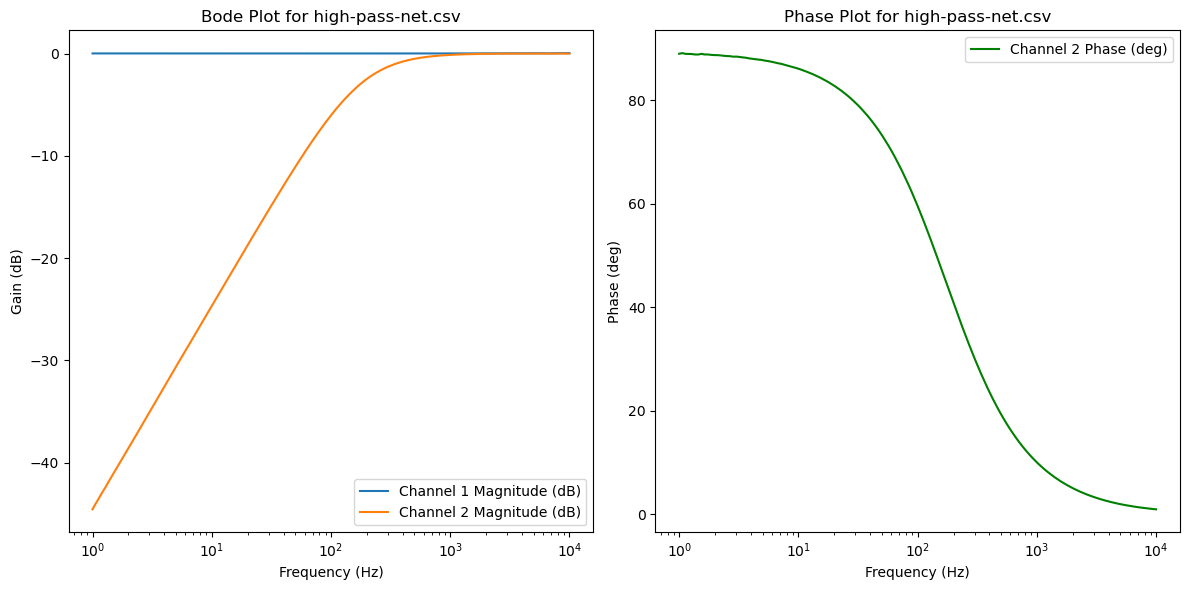

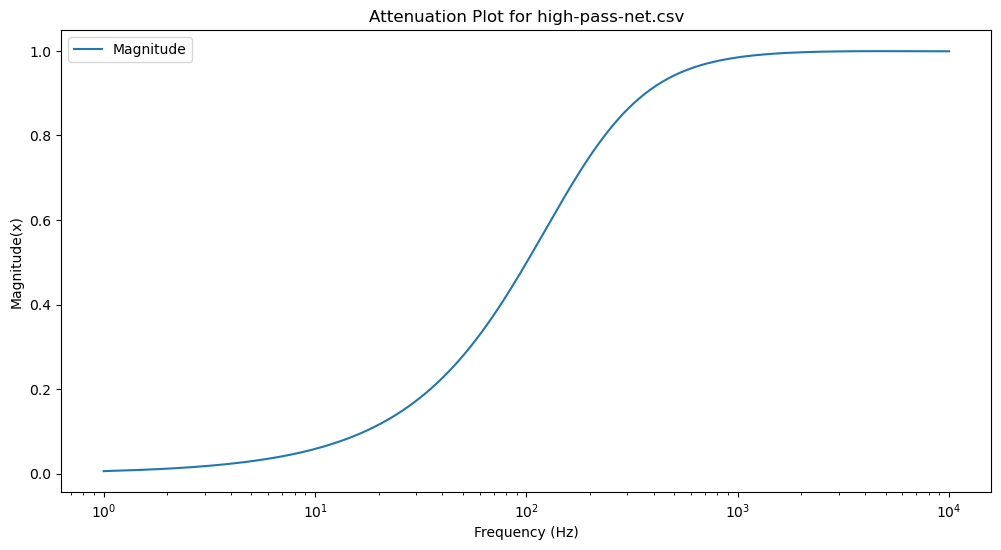

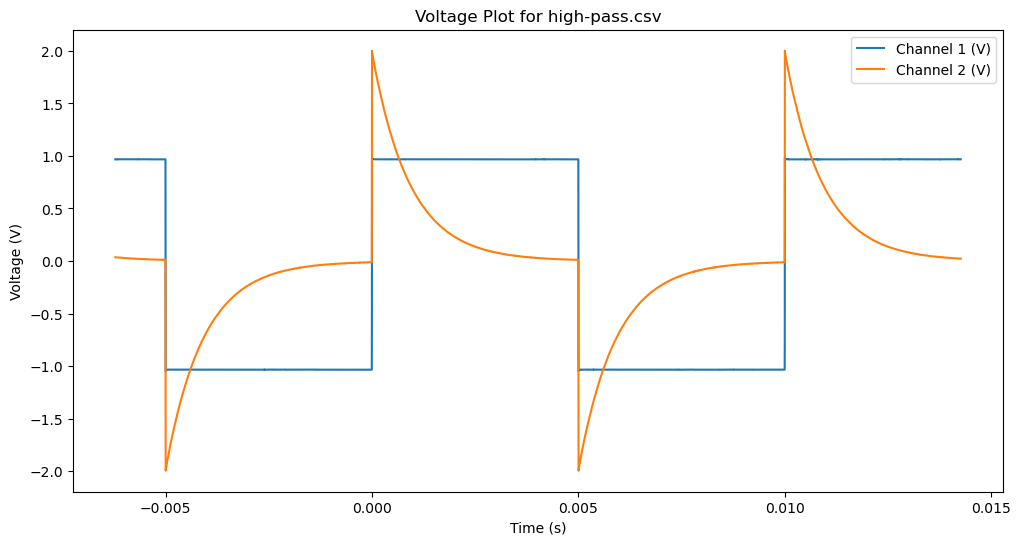

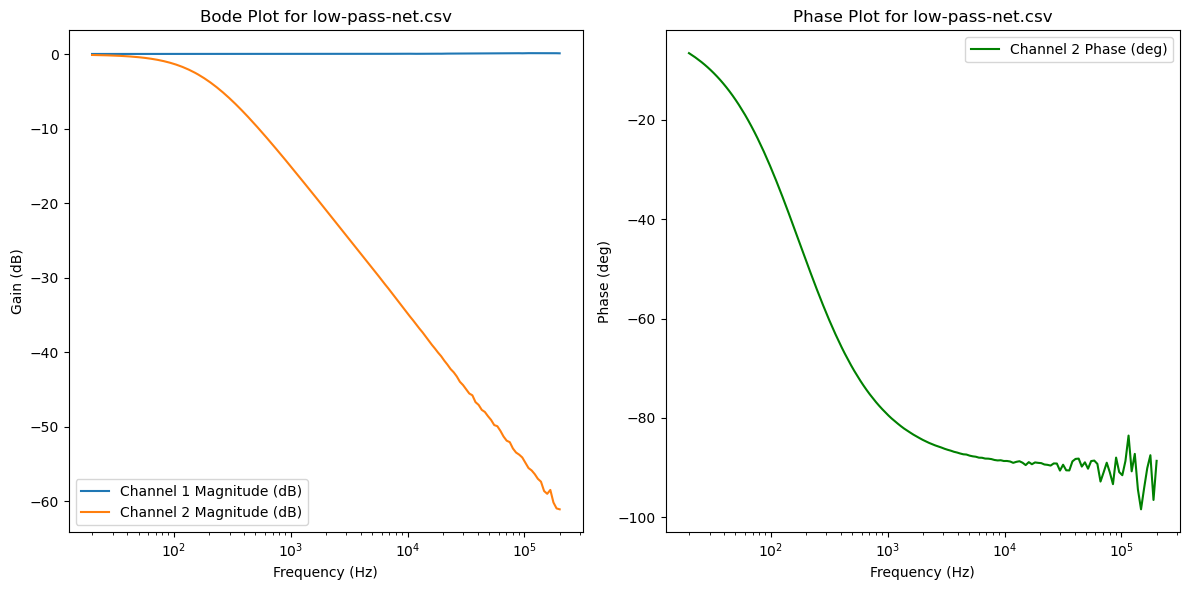

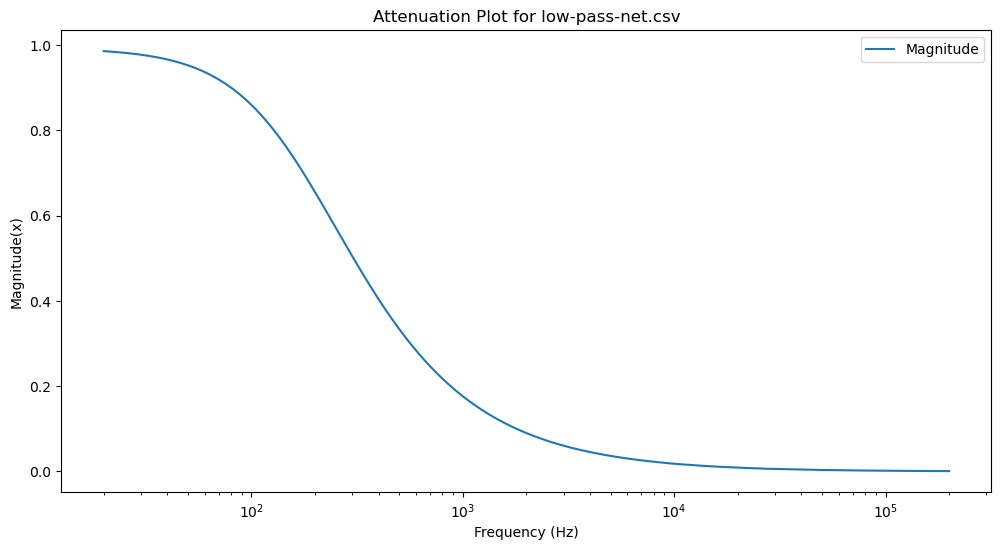

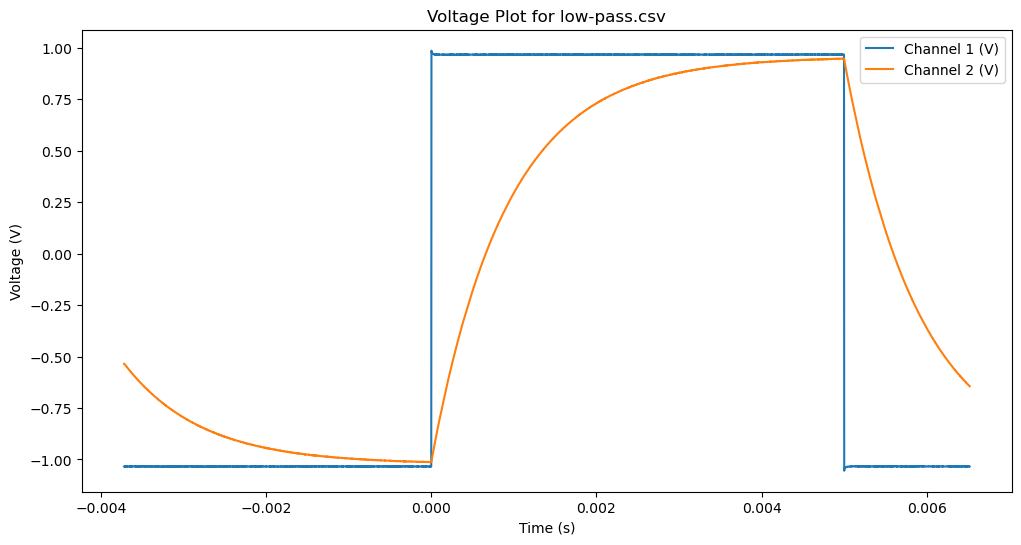

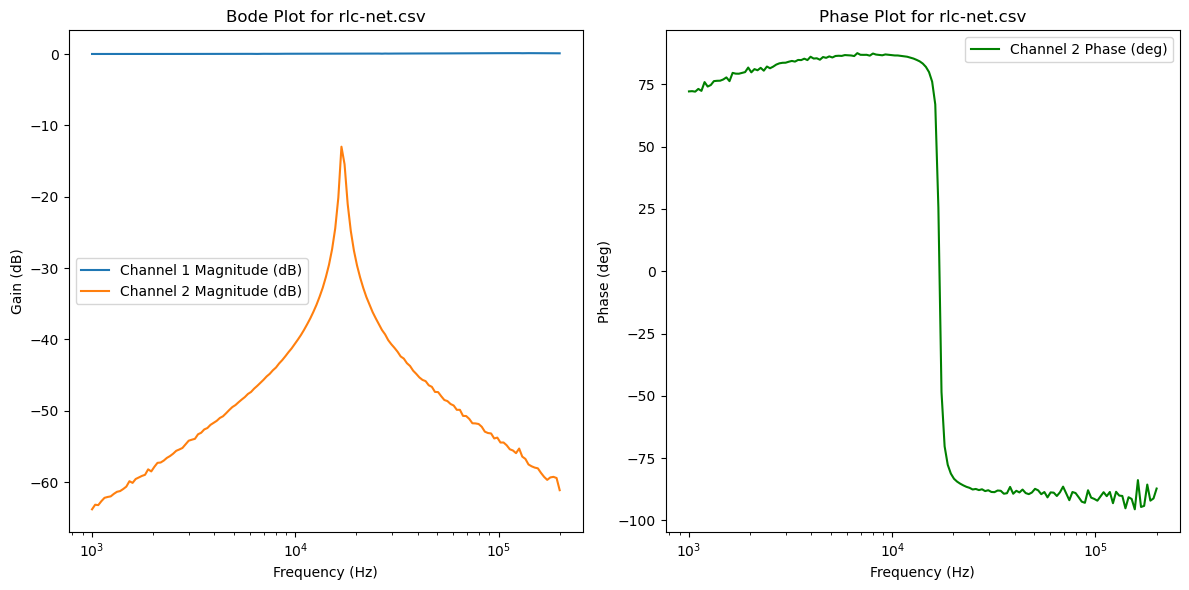

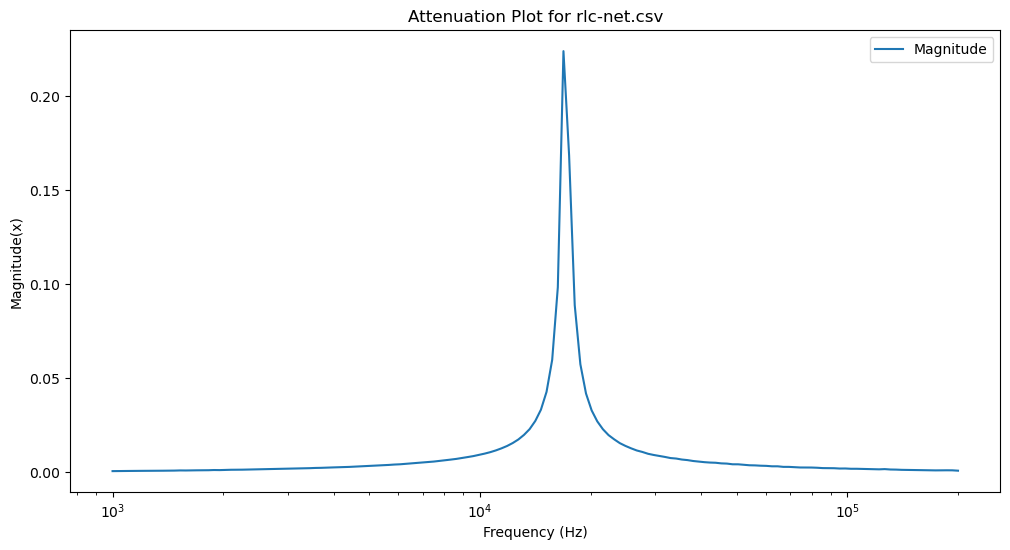

In [4]:
for i in range(len(data)):
    file_name = filelist[i]
    gaindata = 10**(data[i].iloc[:, 2] / 20)
    plt.figure(figsize=(12, 6))

    num_columns = len(data[i].columns)

    if num_columns == 3:
        # Plot for Voltage
        plt.plot(data[i].iloc[:, 0], data[i].iloc[:, 1], label=data[i].columns[1])
        plt.plot(data[i].iloc[:, 0], data[i].iloc[:, 2], label=data[i].columns[2])
        plt.title(f'Voltage Plot for {file_name}')
        plt.xlabel(data[i].columns[0])
        plt.ylabel("Voltage (V)")
        plt.legend()

    elif num_columns == 4:
        # Bode Plot
        plt.subplot(1, 2, 1)
        plt.plot(data[i].iloc[:, 0], data[i].iloc[:, 1], label=data[i].columns[1])
        plt.plot(data[i].iloc[:, 0], data[i].iloc[:, 2], label=data[i].columns[2])
        plt.xscale('log')
        plt.title(f'Bode Plot for {file_name}')
        plt.xlabel(data[i].columns[0])
        plt.ylabel("Gain (dB)")
        plt.legend()

        # Phase Plot
        plt.subplot(1, 2, 2)
        plt.plot(data[i].iloc[:, 0], data[i].iloc[:, 3], color='g', label=data[i].columns[3])
        plt.xscale('log')
        plt.title(f'Phase Plot for {file_name}')
        plt.xlabel(data[i].columns[0])
        plt.ylabel("Phase (deg)")
        plt.legend()

        plt.tight_layout()

        # Attenuation Plot
        plt.figure(figsize=(12, 6))
        plt.plot(data[i].iloc[:, 0], gaindata, label="Magnitude")
        plt.xscale('log')
        plt.title(f'Attenuation Plot for {file_name}')
        plt.xlabel(data[i].columns[0])
        plt.ylabel("Magnitude(x)")
        plt.legend()

    plt.show()
